Total Logins :  4237
Unique Virtual Attendees :  1044
Unique In-Person Attendees :  1216


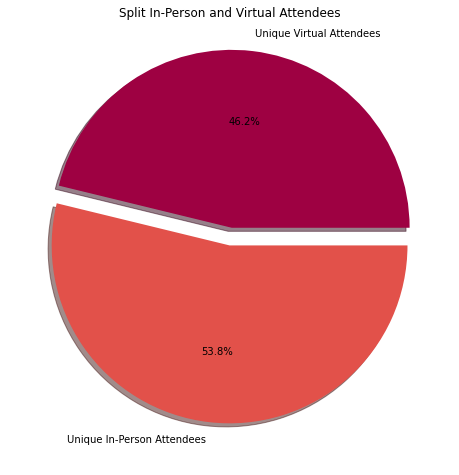

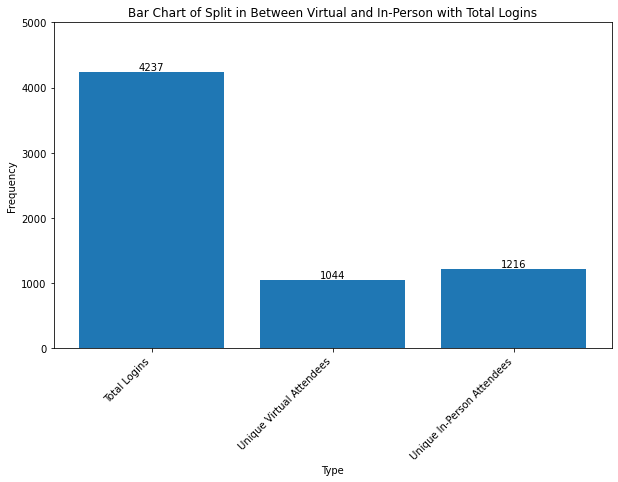

In [1]:
"""
                        Chart showing split between in-person and virtual attendees
        Note: You are required to have preinstalled the needed third party libraries as stated in the documentation
"""

import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.gridspec import GridSpec
from IPython.display import display, HTML


display(HTML("<h1 style='color:brown;text-align:center; font-size:40px;'>Virtual Event Analysis</h1><h3 style='color:blue;text-align:center; font-size:25px;'>Chart showing the split between in-person and virtual attendees </h3>"))

#-----------Database connection ------------#
dbConnect=mysql.connector.connect(host="localhost",user="root",password="password",database="BookMeIn2", auth_plugin='mysql_native_password')
mycursor=dbConnect.cursor()
#for every program run drop the table holding previous analysis data
sql = "DROP TABLE IF EXISTS attendeesSplit_tbl"
mycursor.execute(sql)
#create table for analysis
mycursor.execute("CREATE TABLE attendeesSplit_tbl ( id int NOT NULL AUTO_INCREMENT, name varchar(50) NOT NULL, counts int, PRIMARY KEY (id))")
#compute data from database and insert result into a new table
insertQuery = "INSERT INTO attendeesSplit_tbl(name, counts) VALUES ('Total Logins',(SELECT COUNT(*) FROM `attendee_log` WHERE `reftype`='login')), ('Unique Virtual Attendees', (SELECT COUNT(DISTINCT `attendeeid`) FROM `attendee_log` WHERE `reftype`='login')),('Unique In-Person Attendees', (SELECT COUNT(DISTINCT(`attendee_id`)) FROM `registrations` WHERE registered= 1 AND event_id = 4114))"
mycursor.execute(insertQuery)
dbConnect.commit()

#---------Select data frequencies to allow visualization-------------#
mycursor.execute("SELECT name, counts from attendeesSplit_tbl")
result = mycursor.fetchall
#create array for categories(name) and numbers
name = []
counts = []
#loop through output and append each element in iteration to the right array.
for i in mycursor:
    name.append(i[0])
    counts.append(i[1])
print(name[0], ': ', counts[0])
print(name[1], ': ', counts[1])
print(name[2], ': ', counts[2])
display(HTML("<p>Data: The raw figures for the total logins as well as in-person and virtual attendees. </p>"))

#get values without total    
namewot = np.delete(name,0)
countwot = np.delete(counts,0)

#-----------Plot Pie Chart---------#
myexplode = [0.1, 0]
plt.figure(1, figsize=(20,18))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Split In-Person and Virtual Attendees')                       
type_show_ids = plt.pie(countwot, labels=namewot, autopct='%1.1f%%', shadow=True, colors=colors,  explode = myexplode)
plt.show()

#Chart 1
display(HTML("<p>Chart 1: Pie chart displaying the split between in-person and virtual attendees. The relevant percentages are labelled. The split between in-person and virtual attendees was quite close at 53.8% and 46.2%, respectively.</p>"))


plt.figure(figsize=(10,6))
plt.bar(name, counts)
plt.ylim(0, 5000)
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Bar Chart of Split in Between Virtual and In-Person with Total Logins")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
for i in range(len(counts)):
    plt.annotate(str(counts[i]), xy=(name[i],counts[i]), ha='center', va='bottom')
plt.show()

#Chart 2 Description
display(HTML("<p>Chart 2: Bar graph showing the frequency of each of the categories shown in Chart 1. There were 1216 in-person attendees and 1044 virtual attendees (with a total number of 4237 logins).</p>"))

footer = "<div style='width:100%; text-align:center;'><a href='1-attendees-analysis' style='color:blue;'>Previous</a> <a href='Question3_4.html' style='color:blue;'>Next</a></div>"
display(HTML(footer))